In [37]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [38]:
# Import the data
yield_df = pd.read_csv("./datasets/yield_df.csv", index_col=0)

In [39]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [40]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [41]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [42]:
yield_df.columns  

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [43]:
yield_df.tail()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


In [44]:
# Check the info about the data
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [45]:
# Check for missing values

yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

### Visualize the Data

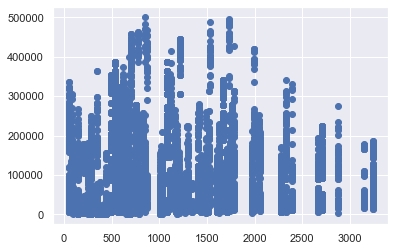

In [46]:
plt.scatter(x = yield_df["average_rain_fall_mm_per_year"], y = yield_df["hg/ha_yield"])
# plt.figure(figsize=(200, 200))
plt.show()

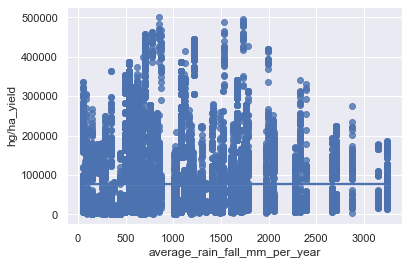

In [47]:
# Using Regplot
sns.regplot(x = yield_df["average_rain_fall_mm_per_year"], y = yield_df["hg/ha_yield"])
plt.show()

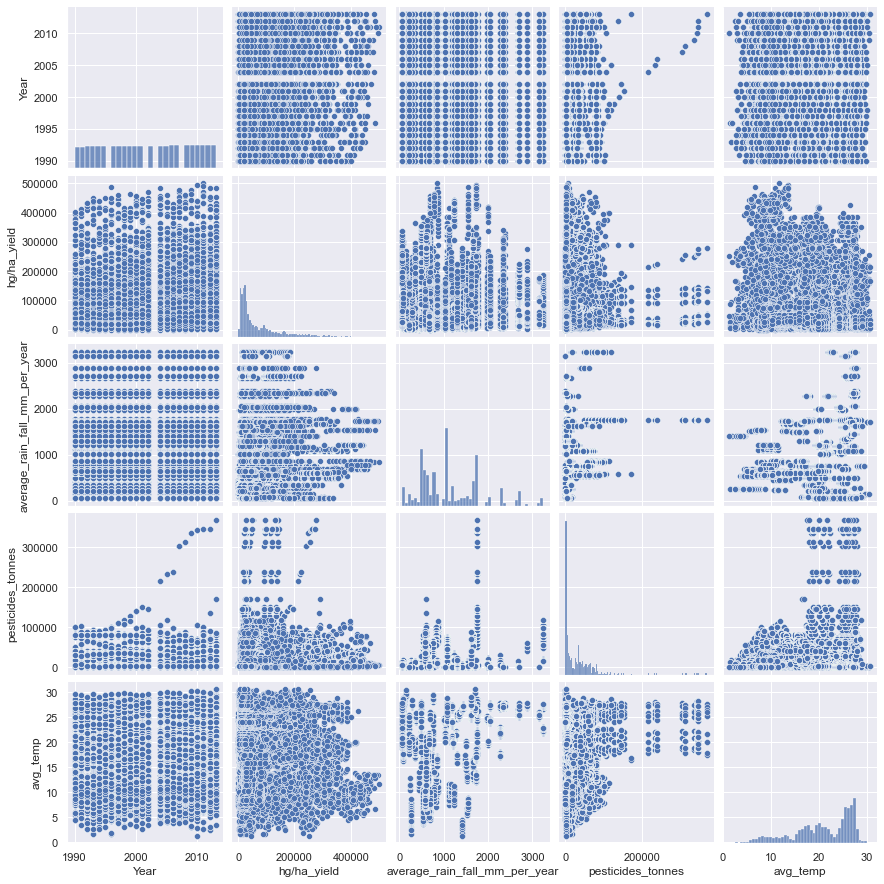

In [48]:
sns.pairplot(yield_df)
plt.show()

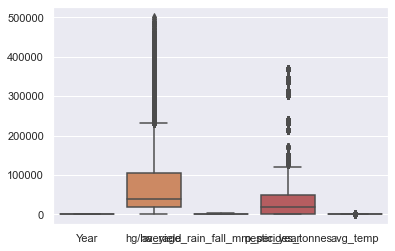

In [49]:
sns.boxplot(data= yield_df)
plt.show()

## Building the Model

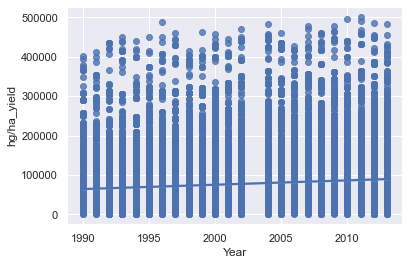

In [50]:
# Check the correlation between year and yield!

sns.regplot(x= yield_df["Year"], y=yield_df["hg/ha_yield"] )
plt.show()

##### The above chart shows there exist a correlation between year and yield!  Therefore I am considering it as a useful feature in my model building


### Build the KN Regression Model


In [51]:
# Import the Libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [52]:
# Split the Dataset

X = yield_df[["Year", "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"]]
y = yield_df["hg/ha_yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
# Now Train the KNRegressors : Instantiate and fit the model

reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, y_train)

KNeighborsRegressor()

In [54]:
# Use the Model to Predict for the couple of test set

reg.predict(X_test)[0:5]

array([118912.6,  54443.8, 137289.6,  50393.6,  33453.6])

In [55]:
# Determine the Train Accuracy... r-squared; coefficient of determination

reg.score(X_train, y_train)

0.15020826835121626

In [56]:
# Determine the test Accuracy... r-squared; coefficient of determination

reg.score(X_test, y_test)

-0.13649546723400907

### Comment
**The following can be concluded from the predictions of the model and it's r-squared value:**

* *The model is underfits the training data and it proves not suitable*
* *The r-sqaure value on the test sets is negative, this implies that the model is too poor.*

*POSSIBLE SOLUTION: use another model!!*


### Build a Linear Regression Model for the DataSet!

In [57]:
# Import the Library

from sklearn.model_selection import train_test_split
X = yield_df[["Year", "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"]]
y = yield_df["hg/ha_yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
# Import the Linear Regression Module

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [59]:
# Predict the yield, on the test data

reg.predict(X_train[:2])

array([62278.44964504, 87598.17863976])

In [60]:
# Determine the accuracy of the model getting the r-squared on the training test

reg.score(X_train, y_train)

0.02480235574968903

In [61]:
# r-squared on the test set

reg.score(X_test, y_test)

0.028582909780705656

### Comment
**The following can be concluded from the predictions of the model and it's r-squared value:**

* *The model is capable of predicting the yield from a given data*
* *It generalises on both the train datasets and the test datasets.... Infact, it generalises well on test data set*

*CONCLUSION : <b>Linear Regression is a suitable model for this task, although some tunings can be done. Try out other models too</b>*


### Build a Ridge Regression

In [62]:
# Import the Ridge Regression Library

from sklearn.linear_model import Ridge

In [67]:
# Build the Model

ridge_model = Ridge(alpha=50).fit(X_train, y_train)

In [68]:
ridge_model.score(X_train, y_train)

0.024802355672521426

In [69]:
ridge_model.score(X_test, y_test)

0.028582630385937113

In [66]:
# Predict for a number of DataPoint

ridge_model.predict(X_test[:5])

array([87281.86638181, 71249.69498431, 90428.2370532 , 82819.42813357,
       75571.07191621])

### Comment: This model isn't more different from the Linear Regression Model in its accuracy... Try another Model